In [1]:

import pandas as pd

In [2]:
!pip3 install wordcloud


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
phishing_emails = pd.read_csv('//Users//atacank//Documents//Repositories//Thesis-Phishing//phishing_emails.csv')
phishing_emails['message'] = phishing_emails['message'].str.lower()

In [4]:
ham_emails = pd.read_csv('//Users//atacank//Documents//Repositories//Thesis-Phishing//ham_emails.csv')

In [5]:
occurences = phishing_emails.message.str.split(expand=True).stack().value_counts()

In [7]:
# function for cleaning numbers in text
def clean_nums(message):
    message = ''.join([i for i in message if not i.isdigit()])
    return message

# function for cleaning the words in UNWANTED_WORDS from the given text
# you can extend the list
def clean_words(message):
    global UNWANTED_WORDS
    for uw in UNWANTED_WORDS:
        message = message.replace(uw, '')
    return message

UNWANTED_WORDS = ['color="#fffffe"',
                  'color="#fffffa"',
                  'color="#fffff6"',
                  'color="#fffffd"',
                  'face="geneva,',
                  '@monkey.org',
                  'facebook',
                  'wetransfer',
                  'thomas',
                  'jpmorgan',
                  'dear',
                  ':',
                  ''
                  'your\udca0paypal\udcae',
                  'color="#fffff5"',
                  'firefox',
                  'noreply@wetransfer.com',
                  'href="',
                  'monkey.org',
                  ''
                  'wellsfargo.com',
                  'hotmail.com',
                  'whatsapp',
                  '______________________________________________________________________',
                  'color="#fffff1"',
                  'color="#ffffff"',
                  'sincerely,paypal',
                  'paypal!the',
                  ''
                  'color="#fffffb"',
                  'onclick="return'
                  'usaa.com.',
                  'omaha',
                  'skype',
                  '<font',
                  'color="#fffff3"',
                  'font-family:',
                  'aol.com',
                  'citibank,',
                  'citibank'
                  'color="#fffffc"',
                  'ubuntu',
                  'greetings',
                  'georgia',
                  'paypal',
                  'color="#fffff7"',
                  'jane',
                  ''
                  'avast',
                  'washington',
                  'jose@',
                  'sincerely.',
                  'tel:',
                  'alibaba.com',
                  'alibaba',
                  'tenesse',
                  'www.ebay.com'
                  'auto-generated',
                  'dhl',
                  'jpmorgan',
                  '-',
                  'all rights reserverd',
                  'face="arial,'
                  're:',
                  'sincerely',
                  'robinson',
                  'usaa.',
                  'src="',
                  'colspan=2&gt;&lt;img',
                  'please do not respond to this message',
                  '________________________________',
                  'paypal,',
                  'from:',
                  'usaa',
                  'ebay',
                  'inc.',
                  'thanks',
                  'thank you',
                  'please',
                  'sincerely',
                  'paypal.',
                  'microsoft',
                  'visa',
                  'n.a.',
                  'helvetica',
                  ]
phishing_emails['message'] = phishing_emails['message'].map(clean_nums)
phishing_emails['message'] = phishing_emails['message'].map(clean_words)

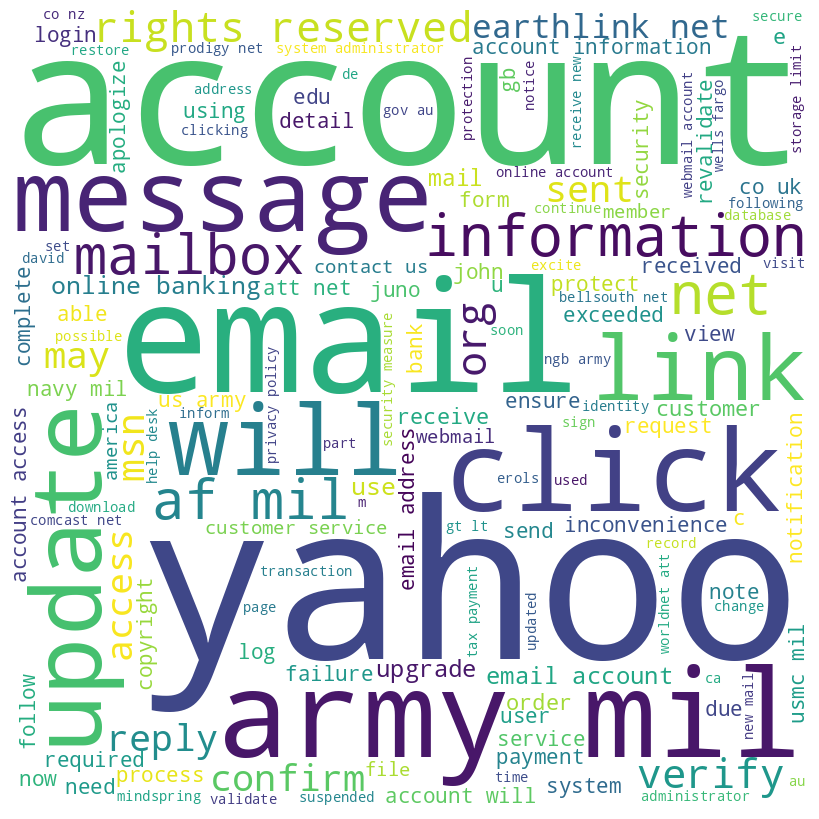

In [8]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = list(phishing_emails['message'])
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [10]:
freq_df_ham = pd.read_csv('/Users/atacank/Desktop/thesis ss etc/freq_df_ham.csv')
freq_df_phishing = pd.read_csv('/Users/atacank/Desktop/thesis ss etc/freq_df_phishing.csv')

In [13]:
data_ham = dict(zip(freq_df_ham['word'].tolist(), freq_df_ham['count'].tolist()))
data_phishing = dict(zip(freq_df_phishing['word'].tolist(), freq_df_phishing['count'].tolist()))

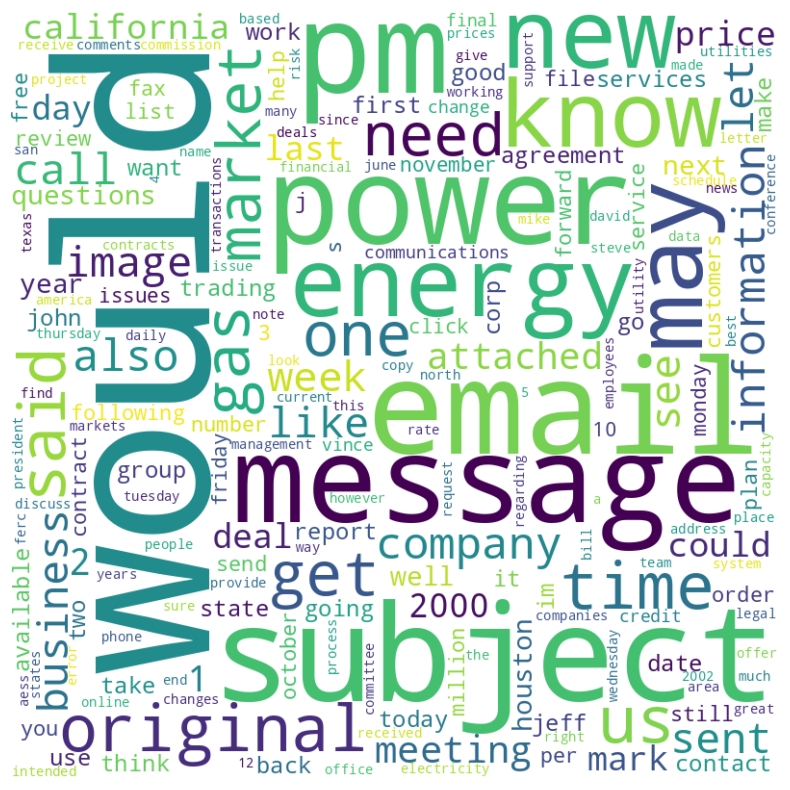

<Figure size 640x480 with 0 Axes>

In [27]:
wc = WordCloud(background_color='white', width=800, height=800).generate_from_frequencies(data_ham)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()


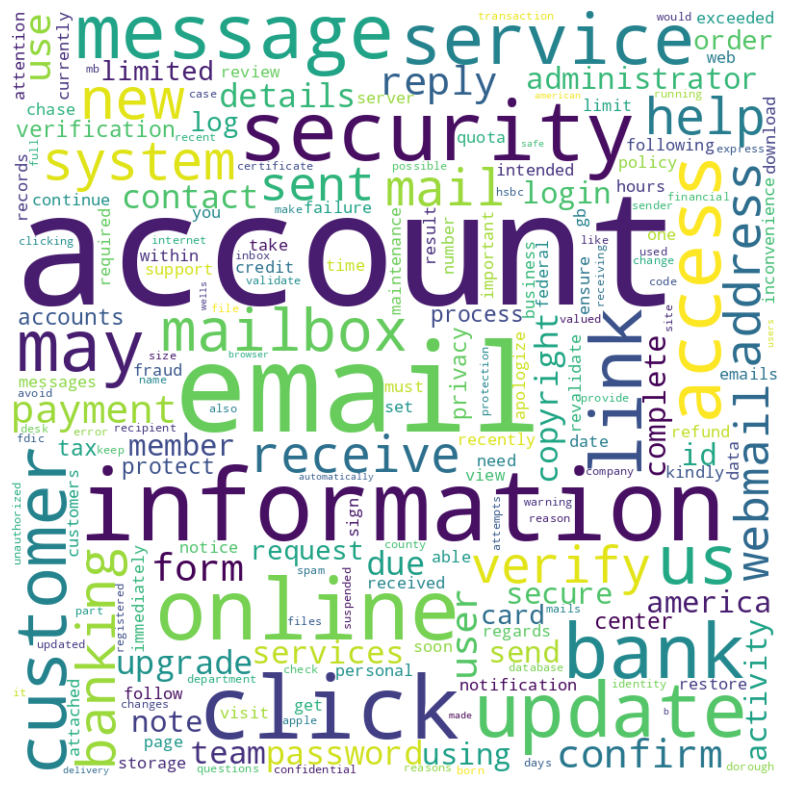

<Figure size 640x480 with 0 Axes>

In [28]:
wc = WordCloud(background_color='white', width=800, height=800).generate_from_frequencies(data_phishing)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
